## Group assignment 1
Linear Regression using Normal Equation and Gradient Descent   
IEC2016012   
IEC2016027   
IEC2016072   
IEC2016065   
ECM2016003   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [2]:
df = pd.read_csv('Housing.csv', index_col='Unnamed: 0')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [3]:
df.shape

(546, 12)

In [4]:
df.describe(include='all')

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
count,546.000000,546.000000,546.000000,546.000000,546.000000,546,546,546,546,546,546.000000,546
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no
freq,NaN,NaN,NaN,NaN,NaN,469,449,355,521,373,NaN,418
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,NaN,NaN,NaN,NaN,NaN,0.692308,NaN
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,NaN,NaN,NaN,NaN,NaN,0.861307,NaN
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 1 to 546
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 55.5+ KB


In [6]:
df.corr()

,price,lotsize,bedrooms,bathrms,stories,garagepl
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.383302
lotsize,0.535796,1.000000,0.151851,0.193833,0.083675,0.352872
bedrooms,0.366447,0.151851,1.000000,0.373769,0.407974,0.139117
bathrms,0.516719,0.193833,0.373769,1.000000,0.324066,0.178178
stories,0.421190,0.083675,0.407974,0.324066,1.000000,0.043412
garagepl,0.383302,0.352872,0.139117,0.178178,0.043412,1.000000


In [7]:
df.driveway = df.driveway.eq('yes').mul(1)
df.recroom = df.recroom.eq('yes').mul(1)
df.fullbase = df.fullbase.eq('yes').mul(1)
df.gashw = df.gashw.eq('yes').mul(1)
df.airco = df.airco.eq('yes').mul(1)
df.prefarea = df.prefarea.eq('yes').mul(1)

In [8]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


# Linear Regression using Normal Equation

In [9]:
x = df[['lotsize']] #,'bedrooms','bathrms'
y = df['price']

In [10]:
print(x.shape, y.shape)

(546, 1) (546,)


In [11]:
w = np.dot(np.linalg.inv(np.dot(x.T,x)),np.dot(x.T,y))
w

array([12.23055227])

In [12]:
h = np.dot(x,w)
h.shape

(546,)

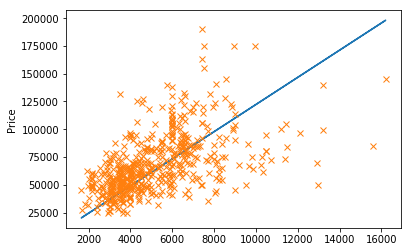

In [13]:
plt.plot(x,h,x,y,'x')
plt.ylabel("Price")
plt.show()

In [14]:
score = np.sum((np.abs(np.divide((h-y),y))))/h.size
print("Score using naive Linear Regression: " + str(score))

Score using naive Linear Regression: 0.2836899349357931


In [15]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x,y)
print("Score using scikit-learn: " + str(clf.score(x,y)))

Score using scikit-learn: 0.28707700259705604


# Gradient Descent

In [16]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [17]:
print("x.shape: " + str(x.shape))
print("y.shape: " + str(y.shape))
m = x.shape[0]
n = x.shape[1]
print("m: " + str(m))
print("n: " + str(n))

t = np.ones((m,1))
x = np.hstack((t,x))
print("x.shape after appending a column for bias: " + str(x.shape))

x.shape: (546, 1)
y.shape: (546,)
m: 546
n: 1
x.shape after appending a column for bias: (546, 2)


In [18]:

y = np.array(y)
y = np.reshape(y,(y.shape[0],1))
print("x.shape: " + str(x.shape))
print("w.shape: " + str(w.shape))
print("y.shape: " + str(y.shape))
print("")
print("Result for different values of alpha -")

alpha = 0.001 # Learning rate
epsilon = 0.00000001
log1 = np.array([])
log2 = np.array([])
log3 = np.array([])
while(alpha < 1):
    J_prev=100
    J=0
    iterations = 0
    temp = np.zeros((n+1,1))
    w = np.zeros((1,n+1))
    while(abs(J_prev-J) > epsilon):
        h = np.dot(x,w.T)
        for i in range(n+1):
            temp[i] = w[:,i] - alpha*(1/m)*(np.sum( (h-y)*x[:,i:i+1], axis=0))
        for i in range(n+1):
            w[:,i] = temp[i]
        J_prev = J
        J = (1/(2*m))*np.sum(np.square(h-y))
        if(alpha == 0.001):
            log1 = np.append(log1, J)
        if(alpha == 0.01):
            log2 = np.append(log2, J)
        if(alpha == 0.1):
            log3 = np.append(log3, J)
        iterations+=1
    if(alpha == 0.001):
        w1 = w 
        t1 = iterations
    if(alpha == 0.01):
        w2 = w 
        t2 = iterations
    if(alpha == 0.1):
        w3 = w 
        t3 = iterations
    print(" alpha = ",alpha," cost = ",J," iterations = ",iterations)
    alpha = alpha*(10)

x.shape: (546, 2)
w.shape: (1,)
y.shape: (546, 1)

Result for different values of alpha -
 alpha =  0.001  cost =  inf  iterations =  35
 alpha =  0.01  cost =  inf  iterations =  29
 alpha =  0.1  cost =  inf  iterations =  25


/home/subtleseeker/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/subtleseeker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
/home/subtleseeker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


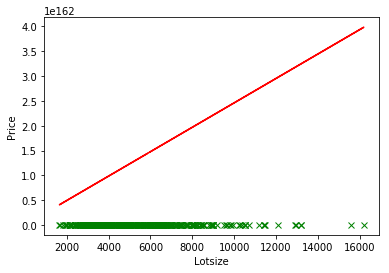

In [19]:
# Hypothesis for alpha = 0.001
w = w1
h = np.dot(x,w.T)
plt.plot(x[:,1],h,'r',x[:,1],y,'gx')
plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.show("Lotsize vs Price")
plt.show()

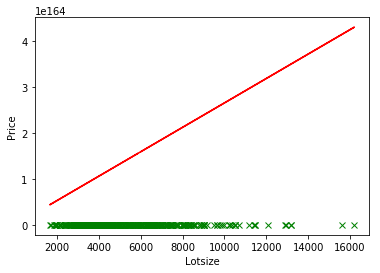

In [20]:
# Hypothesis for alpha = 0.01
w = w2
h = np.dot(x,w.T)
plt.plot(x[:,1],h,'r',x[:,1],y,'gx')
plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.show("Lotsize vs Price")
plt.show()

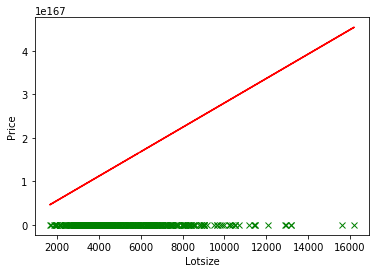

In [21]:
# Hypothesis for alpha = 0.1
w = w3
h = np.dot(x,w.T)
plt.plot(x[:,1],h,'r',x[:,1],y,'gx')
plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.show("Lotsize vs Price")
plt.show()

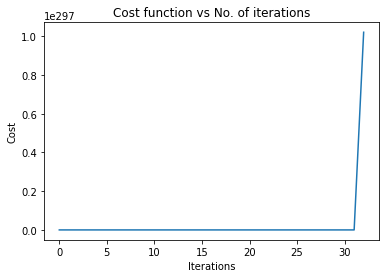

In [22]:
#plot for alpha == 0.001
log = log1
it = np.arange(t1)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

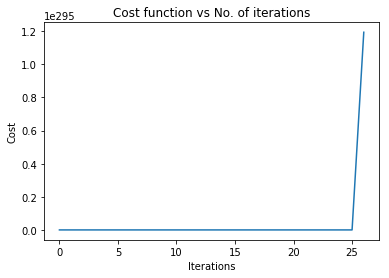

In [23]:
#plot for alpha == 0.01
log = log2
it = np.arange(t2)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

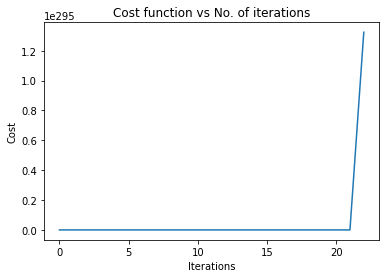

In [24]:
#plot for alpha == 0.1
log = log3
it = np.arange(t3)
plt.plot(it, log)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function vs No. of iterations')
plt.show()

In [25]:
log.min()

2676139350.6538463

# CONCLUSION

Minimum value for loss as obtained using gradient descent is $\infty$. The naive normal equation method for linear regression returns an accuracy of around $20$ percent for all the trained inputs.

#### Normalization was not performed on gradient descent which resulted in explosion of cost function. Without normalization, gd cannot work properly.

The major differences between the gradient descent approach and the linear regression normal equation approach lie in a few major categories: 

### 1. Existence of matrix inverse 
The normal equation method requires the existence of the inverse of the matrix multiplication of the input matrix and its transpose. This inverse may or may not exist. Hence, this makes it less robust than the Gradient Descent algorithm, which poses no such bounds on the matrices. The Gradient Descent algorithm trades robustness for computational ease and accuracy.  

### 2. Correctness 
The values of weights from the normal method are known to be minimal by calculus. However, the same cannot be said of the values derived from Gradient Descent, whose weight values are randomly initialised and made to converge at a particular point - ideally the minimum. However, this process is long and we can never be sure that it's converging at the least possible value. That correct value is obtained easily using the normal equation technique.  

### 3. Effect of learning rate 
We also note that in case of Gradient Descent, there is another parameter introduced into the entire process of deriving the optimal weights - this parameter is called the learning rate. This learning rate helps us adjust the step value taken in going towards the optimal value of weights. This can significantly alter the process: taking a high value of learning rate will make us compute faster, but it won't always return the correct value. 

On the other hand, taking a very small value of the learning rate can help us achieve the optimal value of the weights, but this requires significantly higher amounts of computational power since the number of steps to be taken also increases by a large amount. 

This helps us establish the differences between the Normal Equation method and the Gradient Descent technique. Both have their own advantages and disadvantages, however in certain contexts we can prefer either based on our preferences. Robustness is certain with gradient descent, as well as flexibility in choosing our desired level of accuracy. However, if fault tolerance is minimal, we might prefer to use the normal method to obtain the values directly. 
